## BUSINESS UNDERSTANDING

Customer churn is one of the biggest problems facing telecom companies at the moment.Research has shown that the average monthly churn rate among the top 4 wireless carriers  is 1.9%. A telecom company wants to know the reasons why customers churn and also find ways to ensure that customers do not churn.By understanding the reasons behind customer churn, we aim to develop strategies to mitigate this situation and improve customer retention.


## Objectives


* Explore customer demographics, usage patterns, and service features to uncover potential churn drivers.
* Develop predictive models to forecast customer churn and evaluate their accuracy.
* Generate actionable insights and recommendations for the company to reduce churn and improve customer retention.
* Propose strategies and initiatives that can be implemented to mitigate churn, based on the identified insights and predictive models.

## Data Overview

In [135]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modelling Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [136]:
#load the data
df = pd.read_csv('/home/christine/Downloads/churn dataset/bigml_59c28831336c6604c800002a.csv')

In [137]:
#read the data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [138]:
df.shape

(3333, 21)

$ Inference $
There is a total of ```3333``` rows and ```21``` columns

In [139]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [140]:
#Dropping the phone number column
df.drop(columns=['phone number'], inplace=True)

$ Inference : $
The phone number column will not be significant in checking customer churn rate

In [141]:
column_convert = ['international plan','voice mail plan']
for i in column_convert:
    df[i].replace(to_replace='yes',value=1,inplace= True)
    df[i].replace(to_replace='no',value= 0,inplace= True)

    
df['churn'].replace(to_replace=False,value=0,inplace=True)
df['churn'].replace(to_replace=True,value=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [143]:
#Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [144]:
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [145]:
#check for duplicated data
df.duplicated().sum()

0

## Univariate Analysis

Text(0, 0.5, 'Count')

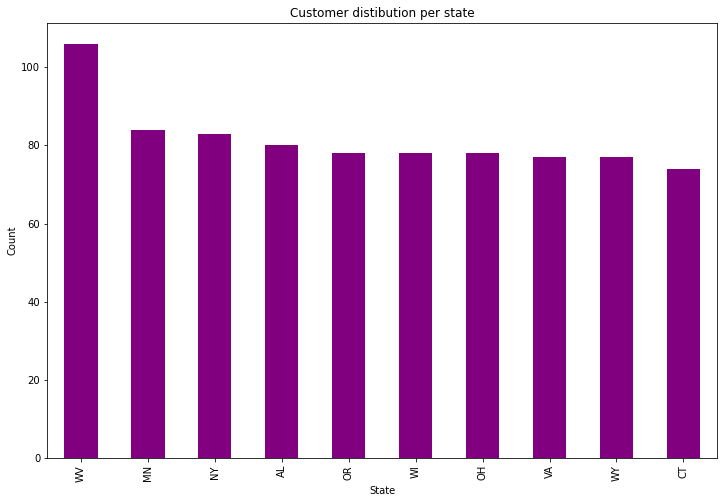

In [146]:
#Customer distibution per state
#setting figsize to 12,8
plt.figure(figsize=(12,8))
df.state.value_counts().head(10).plot(kind= 'bar',color = 'purple')
plt.title('Customer distibution per state')
plt.xlabel('State')
plt.ylabel('Count')


$ Inference $
*showing the distribution of customers across the top 10 states, with each bar representing the count of customers in a particular state

Text(0, 0.5, 'Count')

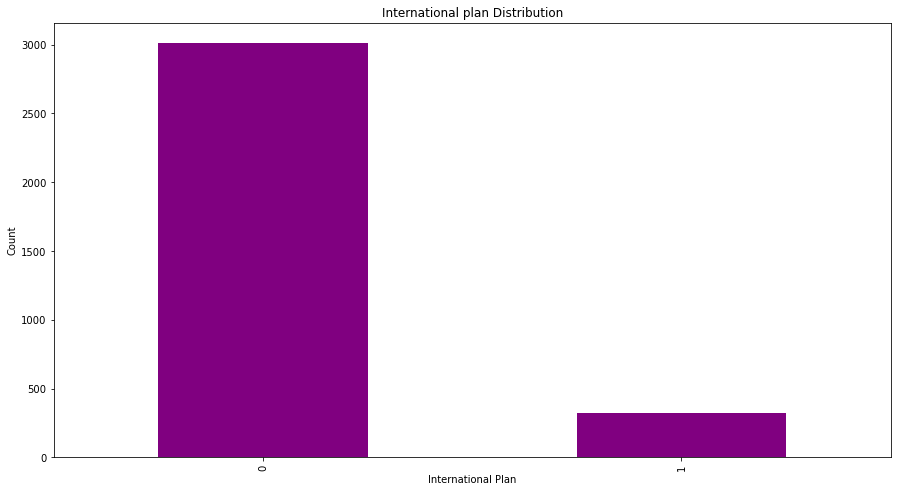

In [147]:
#internation plan column distribution
#setting figsize to 10,8
plt.figure(figsize=(15,8))
df['international plan'].value_counts().plot(kind='bar',color= 'purple')
plt.title('International plan Distribution')
plt.xlabel('International Plan')
plt.ylabel('Count')

$ inference $
* Telecoms with international plan are not so many

Text(0.5, 1.0, 'Area Code Distribution')

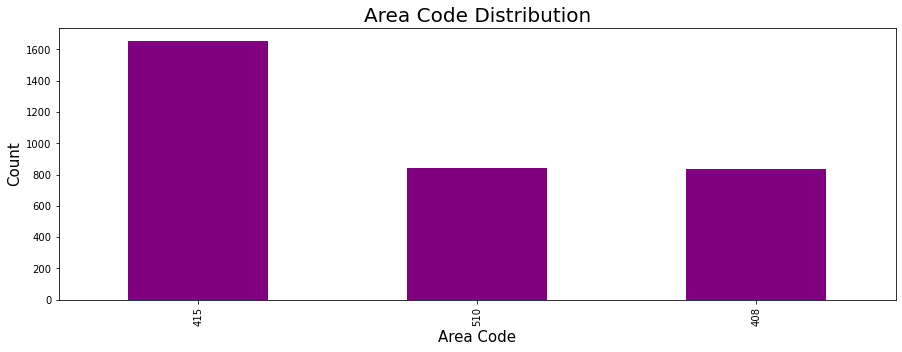

In [148]:
#Area code column distribution
plt.figure(figsize=(15, 5))
df['area code'].value_counts().plot(kind = 'bar',color = 'purple')
plt.xlabel('Area Code',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Area Code Distribution',fontsize = 20)

$ Inference $
* This data represents three area codes which are not normally distributed

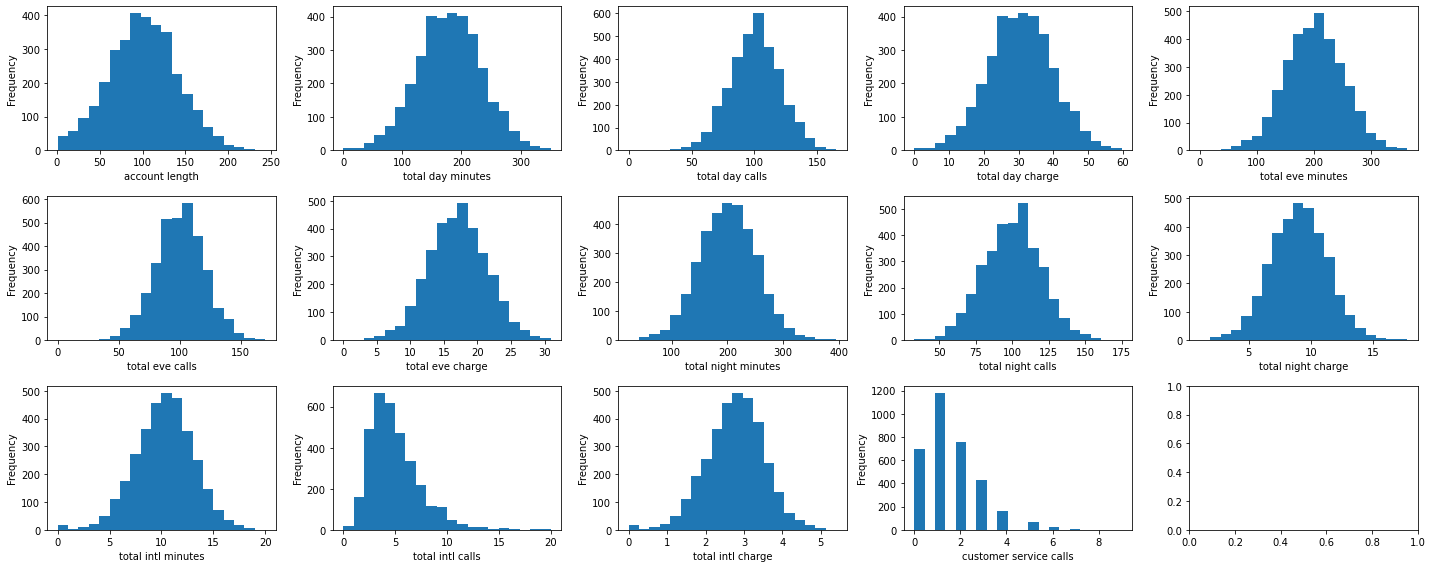

In [150]:
#Variable Distribution
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))
variables = ['account length', 'total day minutes', 'total day calls', 'total day charge',
             'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
             'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
             'total intl charge', 'customer service calls']


for i, variable in enumerate(variables):
    ax = axes[i // 5, i % 5]
    ax.hist(df[variable], bins=20)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

$ Inference $
* Apart from customer service calls column all the other columns are normally distributed

## Bivariate Analysis

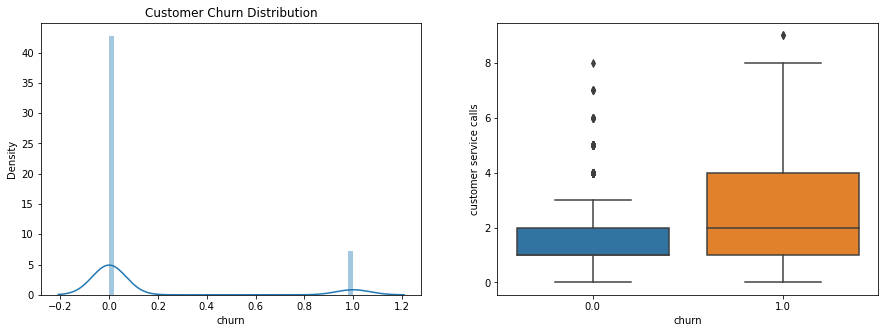

In [151]:
#Churn column distribution
# Ploting Ditribution plot 
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Customer Churn Distribution')
sns.distplot(df.churn)

# Box PLot Distribution

plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.show()

$ Inference $
* The churn column is normally distributed 
* If the customer service is call is high chances of churn are high

Churn rate: 0.14491449144914492


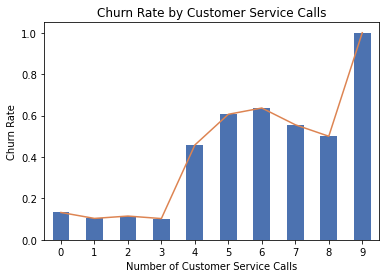

In [152]:
# Calculating Churn rate
churn_rate = df['churn'].mean()
print("Churn rate:", churn_rate)

# Relationship between customer service calls and churn (Bar plot)
df.groupby('customer service calls')['churn'].mean().plot.bar(color='#4C72B0', title='Churn Rate by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
# Impact of customer service call resolution time on churn (Line plot)
df.groupby('customer service calls')['churn'].mean().plot.line(color='#DD8452', title='Churn Rate by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')

# Display the plot
plt.show()

$ Inference $
* The higher the customer service calls the higher the rate of the customer churn

Churn Rate: 14.49%


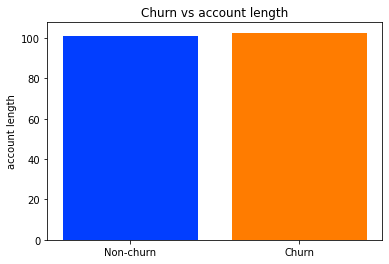

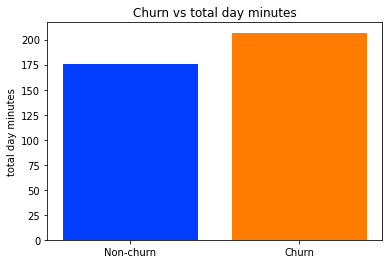

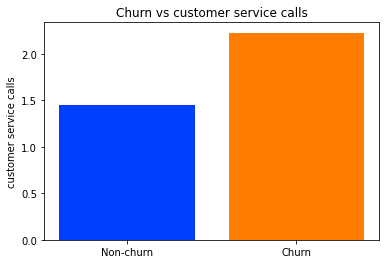

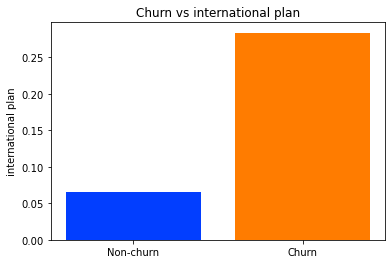

In [158]:
class Churn_relationship:
    def __init__(self, df):
        self.df = df

    def calculate_churn_rate(self):
        churn_rate = self.df['churn'].mean() * 100
        return churn_rate

    def plot_relationship(self, variable):
        fig, ax = plt.subplots()
        ax.set_title(f'Churn vs {variable}')
        colors = sns.color_palette('bright')
        ax.bar(['Non-churn', 'Churn'], [
            self.df.loc[self.df['churn'] == 0, variable].mean(),
            self.df.loc[self.df['churn'] == 1, variable].mean()
        ],color = colors)
        
        ax.set_ylabel(variable)
        plt.show()

    def visualize_churn(self):
        churn_rate = self.calculate_churn_rate()
        print(f'Churn Rate: {churn_rate:.2f}%')

        self.plot_relationship('account length')
        self.plot_relationship('total day minutes')
        self.plot_relationship('customer service calls')
        self.plot_relationship('international plan')


# Create an instance of ChurnAnalyzer with the already imported data
relationship_plot = Churn_relationship(df)
sns.set_palette('bright')
relationship_plot.visualize_churn()


$ Inference $
* The total number of minutes the customer used during the day has a negligable relationship between Non-churn and Churn customer
* Time period the customer has been with the service provider does not affect the churn rate

*  Customer service calls made by the customer affects the churn rate. WE have high churned subscribers with high customer service calls.
* Having no international plan has shown a high rate of customer churn

## Correlation Analysis

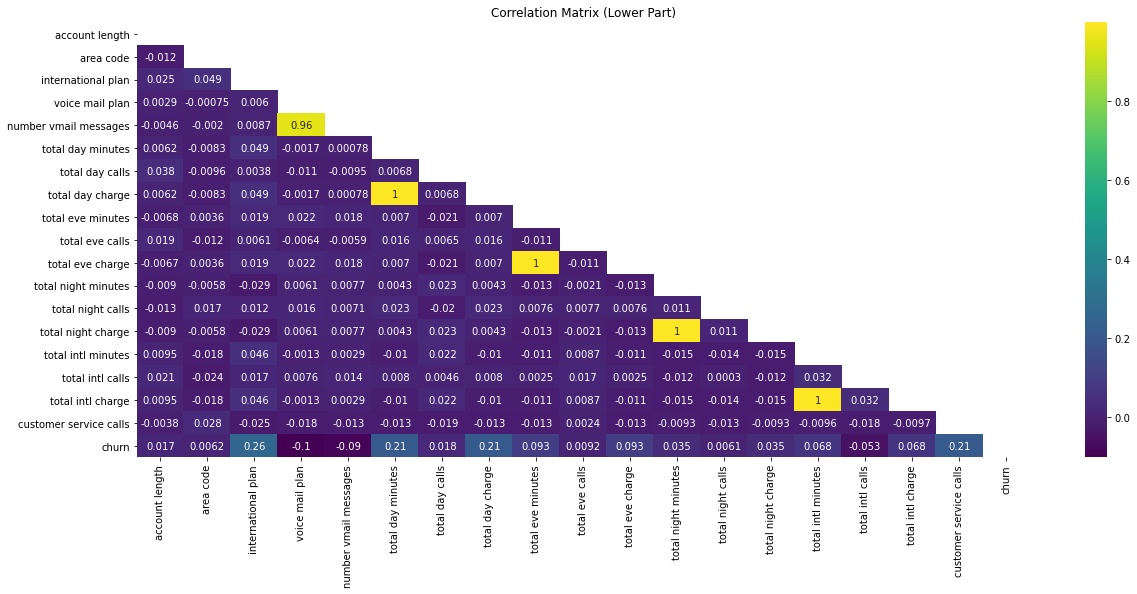

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', mask=mask)
plt.title('Correlation Matrix (Lower Part)')
plt.show()

$ Inference $
* The following columns were dropped because of high multicollinearity between each other
    * voice mail plan
    * total day minutes
    * total eve minutes
    * total night minutes
    * total intl minutes
  

In [ ]:
#dropping the selected columns
df1 = df.drop(['voice mail plan','total day minutes','total eve minutes','total night minutes','total intl minutes'],axis = 1)

## One Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df1,columns=['state'])
df_encoded.head()

,account length,area code,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,25,110,45.07,99,16.78,91,11.01,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,26,123,27.47,103,16.62,103,11.45,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,114,41.38,110,10.30,104,7.32,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,71,50.90,88,5.26,89,8.86,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,113,28.34,122,12.61,121,8.41,...,0,0,0,0,0,0,0,0,0,0


## Split the Data

In [ ]:
y = df_encoded.churn
X = df_encoded.drop('churn',axis=1)

## Normalize the Data

In [ ]:
#instantiate the scaler
scaler = StandardScaler()
#fit and transform
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.676489,-0.523603,-0.327580,1.617086,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
1,0.149065,-0.523603,-0.327580,1.617086,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
2,0.902529,-0.523603,-0.327580,-0.618396,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
3,-0.428590,-0.688834,3.052685,-0.618396,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
4,-0.654629,-0.523603,3.052685,-0.618396,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781


## Train/Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

## Baseline Model - Logistic Regression

In [ ]:
#Instatiate the regressor
logreg = LogisticRegression()

#fit the model
logreg.fit(X_train, y_train)

#predict
y_pred = logreg.predict(X_test)


In [ ]:
#regression model function
def base_model(X_train,y_train):
    acc = accuracy_score(y_test,y_pred)
    fscore = f1_score(y_test,y_pred)
    pscore = precision_score(y_test,y_pred)
    recal = recall_score(y_test,y_pred)
    
    print('Logistic Regression:')
    print(f'Accuracy : {acc:.3f}')
    print(f'F1 Score : {fscore:.3f}')
    print(f'Precision : {pscore:.3f}')
    print(f'Recall : {recal:.3f}')


In [ ]:
base_model(X_train,y_train)

Logistic Regression:
Accuracy : 0.852
F1 Score : 0.075
Precision : 0.667
Recall : 0.040


* Recall: 3.96% - This represents the proportion of true positive predictions out of the actual positive instances in the data. It measures the model's ability to identify positive instances correctly.
* F1 Score: 7.41% - This is the harmonic mean of precision and recall. It provides a single metric to evaluate the balance between precision and recall.

* AUC Score: 76.89% - This represents the area under the Receiver Operating Characteristic (ROC) curve. It measures the model's ability to distinguish between positive and negative instances.

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[850,   7],
       [114,  29]])

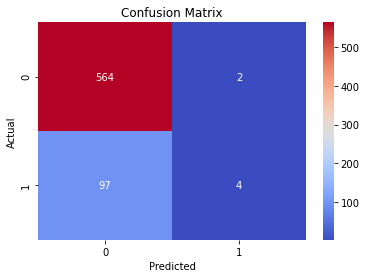

In [ ]:
# Create a heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

$ Inferences $

* Confusion Matrix: ```[[563, 3], [97, 4]]``` - This matrix shows the counts of true negatives (```563```), false positives (3), false negatives (97), and true positives (4). It provides a detailed breakdown of the model's predictions.
* True Negatives ```(TN)```: The model predicted "not churn" ```(0)``` correctly, and the actual value is also "not churn" ```(0)```. In this case, there are ```563``` instances.
* False Positives ```(FP)```: The model predicted "churn" ```(1)```, but the actual value is "not churn" ```(0)```. In this case, there are ```3``` instances.
* False Negatives ```(FN)```: The model predicted "not churn" ```(0)```, but the actual value is "churn" ```(1)```. In this case, there are ```97``` instances.
* True Positives ```(TP)```: The model predicted "churn" ```(1)``` correctly, and the actual value is also "churn" ```(1)```. In this case, there are 4 instances.

The confusion matrix helps us to evaluate the performance of the model in terms of different types of errors it makes. In Our case, you have a relatively large number of false negatives ```(97)```, indicating that the model struggles to correctly identify instances that are actually churned. This could be further supported by the low recall score ```(3.96%)``` in the evaluation results.


## Model 2 - Logistic Regression

In [ ]:
#Drop some columns
df2=df.drop(['number vmail messages','total day charge','total eve charge','total night charge','total intl charge'],axis =1)

## One Hot Encoding

In [ ]:
#Encoding the state column
df_encoded2 = pd.get_dummies(df2,columns=['state'])
df_encoded2.head()

,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,265.1,110,197.4,99,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,161.6,123,195.5,103,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,243.4,114,121.2,110,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,166.7,113,148.3,122,186.9,121,...,0,0,0,0,0,0,0,0,0,0


$ Inference $
* The state column was categorical so one hot encoding was done to change it to numerical

In [ ]:
#Check correlation
df_encoded2.corr().head()

,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
account length,1.000000,-0.012463,0.024735,0.002918,0.006216,0.038470,-0.006757,0.019260,-0.008955,-0.013176,...,0.014912,-0.026651,-0.013148,-0.000397,0.018810,0.012627,0.003555,-0.008476,-0.025631,0.018058
area code,-0.012463,1.000000,0.048551,-0.000747,-0.008264,-0.009646,0.003580,-0.011886,-0.005825,0.016522,...,0.004104,-0.006379,-0.015205,0.024545,-0.012636,0.007823,-0.000510,0.005189,0.029812,-0.001039
international plan,0.024735,0.048551,1.000000,0.006006,0.049396,0.003755,0.019100,0.006114,-0.028905,0.012451,...,-0.006214,0.007003,-0.006819,-0.006819,0.010383,-0.007445,-0.017442,0.002959,-0.018913,0.017134
voice mail plan,0.002918,-0.000747,0.006006,1.000000,-0.001684,-0.011086,0.021545,-0.006444,0.006079,0.015553,...,0.022208,-0.003545,-0.018072,0.000382,-0.014735,-0.019218,-0.039753,0.006313,-0.001233,-0.014735
total day minutes,0.006216,-0.008264,0.049396,-0.001684,1.000000,0.006750,0.007043,0.015769,0.004323,0.022972,...,0.024650,-0.009345,0.004752,0.010353,-0.007147,0.006200,-0.002695,-0.001832,-0.019383,0.001115


In [ ]:
#split the data
y = df_encoded2.churn
X = df_encoded2.drop(['churn'], axis=1)


In [ ]:
#Normalize the data

X_scaled2 = pd.DataFrame(scaler.fit_transform(X))
X_scaled2.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.676489,-0.523603,-0.327580,1.617086,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
1,0.149065,-0.523603,-0.327580,1.617086,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
2,0.902529,-0.523603,-0.327580,-0.618396,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
3,-0.428590,-0.688834,3.052685,-0.618396,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
4,-0.654629,-0.523603,3.052685,-0.618396,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781


In [ ]:
#Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Instatiate the regressor
logreg = LogisticRegression()

#fit the model
logreg.fit(X_train, y_train)

#predict
y_pred = logreg.predict(X_test)


In [ ]:
base_model(X_train,y_train)

Logistic Regression:
Accuracy : 0.857
F1 Score : 0.065
Precision : 0.500
Recall : 0.035


## Decision Tree, Random Forest, KNN

In [ ]:
def models(X_train, y_train):
   
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(X_train, y_train)
    tree_y_pred = tree.predict(X_test)
    tree_acc = accuracy_score(y_test, tree_y_pred)
    tree_f1 = f1_score(y_test, tree_y_pred)
    tree_prec = precision_score(y_test, tree_y_pred)
    tree_rec = recall_score(y_test, tree_y_pred)
    tree_auc = roc_auc_score(y_test, tree_y_pred)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
    forest.fit(X_train, y_train)
    forest_y_pred = forest.predict(X_test)
    forest_acc = accuracy_score(y_test, forest_y_pred)
    forest_f1 = f1_score(y_test, forest_y_pred)
    forest_prec = precision_score(y_test, forest_y_pred)
    forest_rec = recall_score(y_test, forest_y_pred)
    forest_auc = roc_auc_score(y_test, forest_y_pred)

    # K-Nearest Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_y_pred = knn.predict(X_test)
    knn_acc = accuracy_score(y_test, knn_y_pred)
    knn_f1 = f1_score(y_test, knn_y_pred)
    knn_prec = precision_score(y_test, knn_y_pred)
    knn_rec = recall_score(y_test, knn_y_pred)
    knn_auc = roc_auc_score(y_test, knn_y_pred)

    # Print model evaluation metrics
    

    print('Decision Treee:')
    print(f'Accuracy: {tree_acc:.3f}')
    print(f'F1 Score: {tree_f1:.3f}')
    print(f'Precision: {tree_prec:.3f}')
    print(f'Recall: {tree_rec:.3f}')
    print(f'ROC AUC Score: {tree_auc:.3f}')
    print('\n')
    print("............................................")

    print('Random Forest:')
    print(f'Accuracy: {forest_acc:.3f}')
    print(f'F1 Score: {forest_f1:.3f}')
    print(f'Precision: {forest_prec:.3f}')
    print(f'Recall: {forest_rec:.3f}')
    print(f'ROC AUC Score: {forest_auc:.3f}')
    print('\n')
    print("............................................")

    print('KNN:')
    print(f'Accuracy: {knn_acc:.3f}')
    print(f'F1 Score: {knn_f1:.3f}')
    print(f'Precision: {knn_prec:.3f}')
    print(f'Recall: {knn_rec:.3f}')
    print(f'ROC AUC Score: {knn_auc:.3f}')
    print('\n')
    print("............................................")


    # Print models accuracy on training data
    
    # tree_score = tree.score(X_train, y_train)
    # forest_score = forest.score(X_train, y_train)
    # knn_score = knn.score(X_train, y_train)

    
    # print(f"Decision Tree Accuracy: {tree_score:.4f}")
    # print(f"Random Forest Accuracy: {forest_score:.4f}")
    # print(f"KNN Accuracy: {knn_score:.4f}")

    return  tree,forest



In [ ]:
model = models(X_train,y_train)

Decision Treee:
Accuracy: 0.910
F1 Score: 0.690
Precision: 0.680
Recall: 0.699
ROC AUC Score: 0.822


............................................
Random Forest:
Accuracy: 0.924
F1 Score: 0.651
Precision: 0.947
Recall: 0.497
ROC AUC Score: 0.746


............................................
KNN:
Accuracy: 0.862
F1 Score: 0.266
Precision: 0.556
Recall: 0.175
ROC AUC Score: 0.576


............................................


* Based on the performance metrics of the three models, the Random Forest model outperforms the Decision Tree and KNN models in terms of accuracy, precision, and ROC AUC score.  However, the F1 score and recall of the Random Forest model are lower compared to the Decision Tree model.

* The Decision Tree model achieved an accuracy of ```0.910```, F1 score of 0.690, precision of ```0.680```, recall of ```0.699```, and ROC AUC score of ```0.822```.

* On the other hand, the KNN model has the lowest performance among the three models. It achieved an accuracy of ```0.862```, F1 score of ```0.266```, precision of ```0.556```, recall of ```0.175```, and ROC AUC score of ```0.576```

## Hyperparameter Tuning - GridSearchCV

In [ ]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # List of different values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Different weight options
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)
print("AUC Score:", auc_score)



Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.879
Precision: 0.8055555555555556
Recall: 0.20279720279720279
F1 Score: 0.3240223463687151
Confusion Matrix:
 [[850   7]
 [114  29]]
AUC Score: 0.5973145873962676


## ROC Curve for Multiple Models Comparison

In [ ]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree.fit(X_train, y_train)
tree_y_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_y_pred)
tree_f1 = f1_score(y_test, tree_y_pred)
tree_prec = precision_score(y_test, tree_y_pred)
tree_rec = recall_score(y_test, tree_y_pred)
tree_auc = roc_auc_score(y_test, tree_y_pred)

    # Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_y_pred)
forest_f1 = f1_score(y_test, forest_y_pred)
forest_prec = precision_score(y_test, forest_y_pred)
forest_rec = recall_score(y_test, forest_y_pred)
forest_auc = roc_auc_score(y_test, forest_y_pred)

    # K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_prec = precision_score(y_test, knn_y_pred)
knn_rec = recall_score(y_test, knn_y_pred)
knn_auc = roc_auc_score(y_test, knn_y_pred)



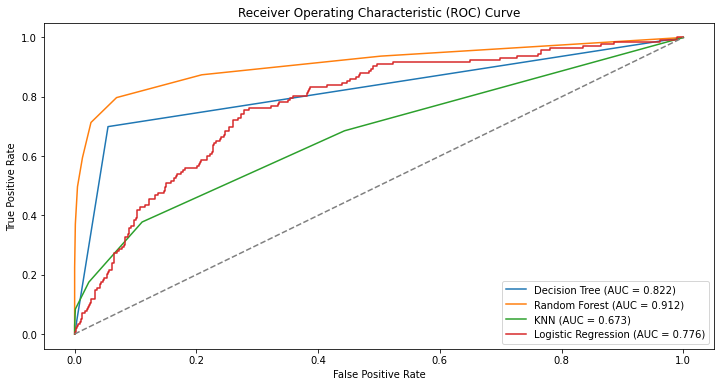

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the predicted probabilities for each model
tree_probs = tree.predict_proba(X_test)[:, 1]
forest_probs = forest.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
log_probs = logreg.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC for each model
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
tree_auc = roc_auc_score(y_test, tree_probs)

forest_fpr, forest_tpr, _ = roc_curve(y_test, forest_probs)
forest_auc = roc_auc_score(y_test, forest_probs)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
log_auc = roc_auc_score(y_test, log_probs)


# Plot ROC curves
plt.figure(figsize=(12,6))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = {:.3f})'.format(tree_auc))
plt.plot(forest_fpr, forest_tpr, label='Random Forest (AUC = {:.3f})'.format(forest_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.3f})'.format(knn_auc))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = {:.3f})'.format(log_auc))

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')


# Set plot legend
plt.legend()

# Show the plot
plt.show()



## Conclusion

* Random Forest: The Random Forest model has the highest AUC score of 0.912, indicating better class separation compared to the other models. This suggests that the Random Forest model performs well in distinguishing between the classes.

* Decision Tree: The Decision Tree model has an AUC score of 0.822, which is lower than the Random Forest model but still indicates a good level of class separation. The Decision Tree model performs reasonably well in distinguishing between the classes
* Logistic Regression: The Logistic Regression model has an AUC score of 0.776936. While it has a lower AUC score compared to the Random Forest and Decision Tree models, it can still provide some level of class separation, although not as strong as the other models.
* KNN: The KNN model has the lowest AUC score of 0.673, indicating relatively weaker class separation compared to the other models. The KNN model may struggle to distinguish between the classes effectively.

Based on the AUC scores alone, the Random Forest model appears to be the best performer among the four models.